# Salary Hike Model

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(r"F:\Data Science\Assignments\4. Simple Linear Regression/Salary_Data.csv")

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [14]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [18]:
data.duplicated().sum()

0

## Outlier detection

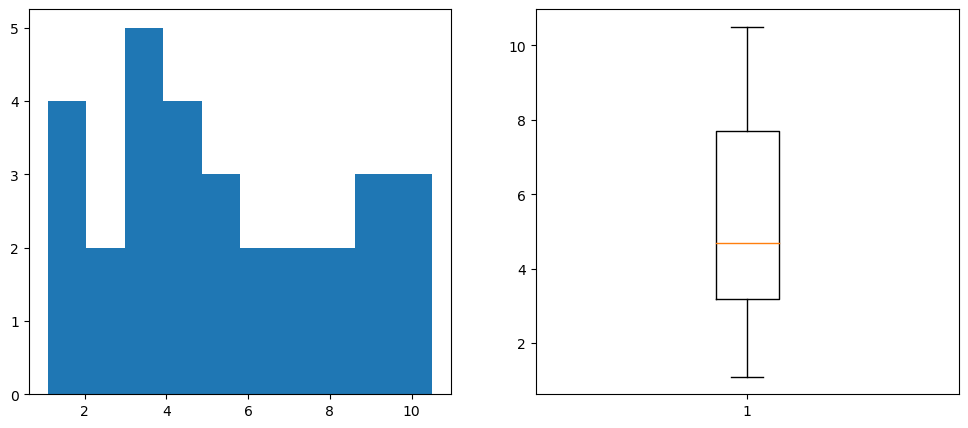

In [24]:
fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.hist(data.YearsExperience)


plt.subplot(1,2,2)
plt.boxplot(data.YearsExperience)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x25500eebd30>,
 'caps': [<matplotlib.lines.Line2D at 0x25500ef8310>,
 'boxes': [<matplotlib.lines.Line2D at 0x25500eeba60>],
 'medians': [<matplotlib.lines.Line2D at 0x25500ef88b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25500ef8b80>],
 'means': []}

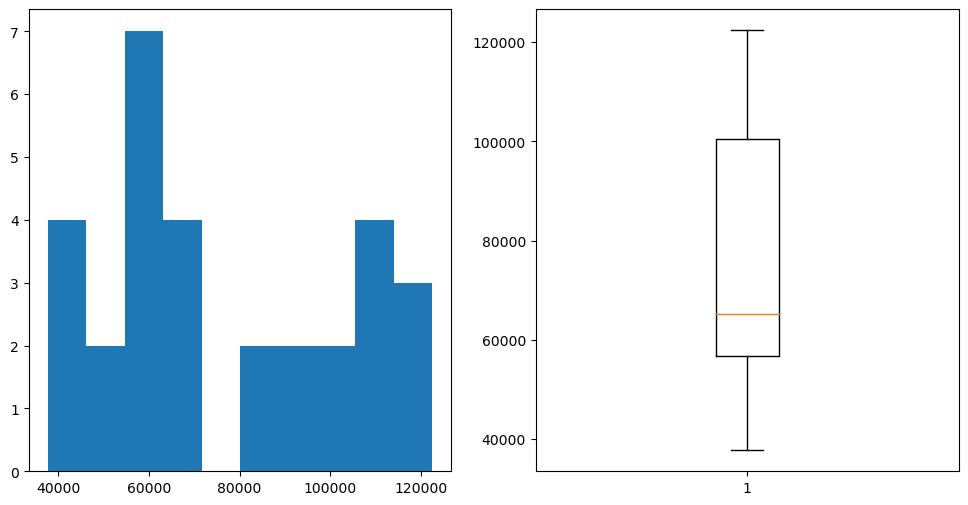

In [26]:
fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(data.Salary)

plt.subplot(1,2,2)
plt.boxplot(data.Salary)


In [28]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


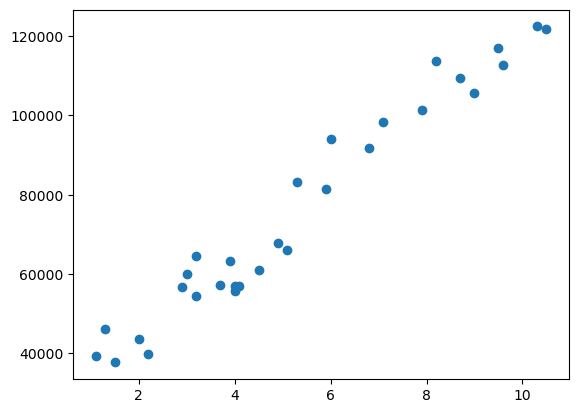

In [29]:
plt.scatter(data["YearsExperience"], data["Salary"])

## Fitting Simple linear model

In [30]:
import statsmodels.formula.api as smf

In [31]:
model = smf.ols("Salary ~ YearsExperience" , data = data).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        12:54:58   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [38]:
model.tvalues

Intercept          11.346940
YearsExperience    24.950094
dtype: float64

In [39]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [40]:
model.rsquared, model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Residual analysis test for normality of residual (Q-Q plot)

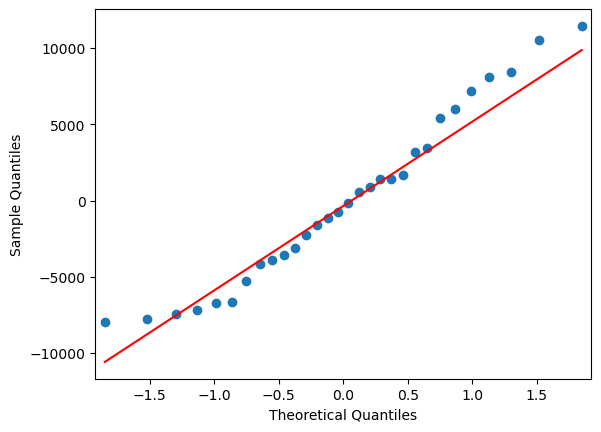

In [42]:
import statsmodels.api as sm

qqplot = sm.qqplot(model.resid, line = "q")

# Residual Plot to check Homoscedasticity

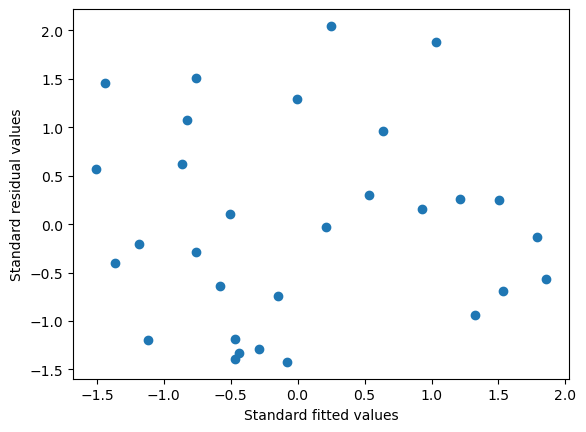

In [52]:
fitted_values = StandardScaler().fit_transform(pd.DataFrame(model.fittedvalues))
residual_values = StandardScaler().fit_transform(pd.DataFrame(model.resid))


plt.scatter(fitted_values, residual_values)
plt.xlabel("Standard fitted values")
plt.ylabel("Standard residual values")
plt.show()

eval_env: 1


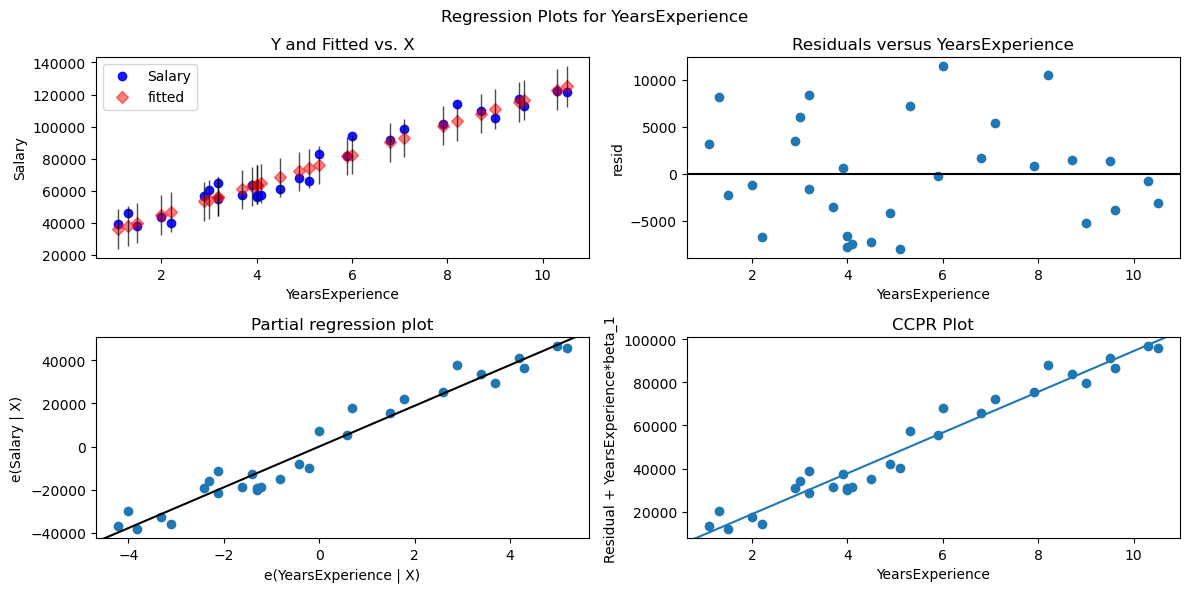

In [54]:
fig = plt.figure(figsize = (12,6))
fig = sm.graphics.plot_regress_exog(model, "YearsExperience", fig = fig)

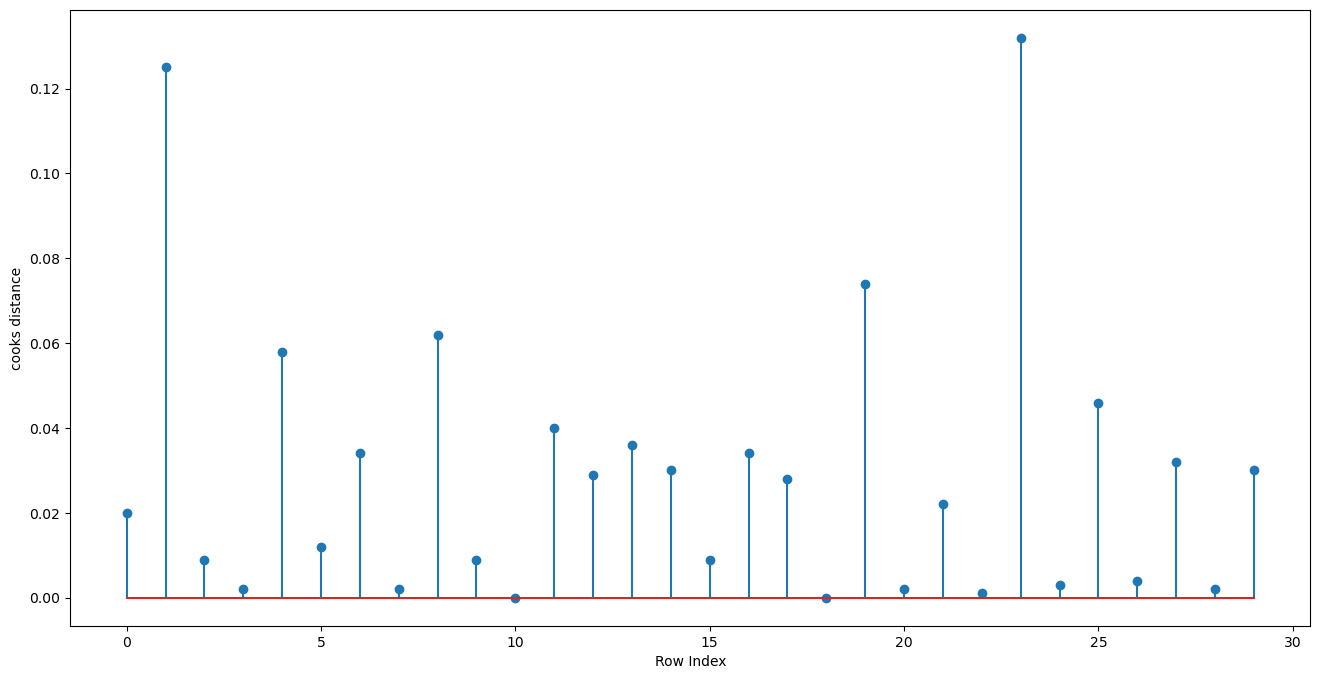

In [57]:
model_inf = model.get_influence()
(c,_) = model_inf.cooks_distance

fig = plt.figure(figsize = (16,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("cooks distance")
plt.show()

In [58]:
(np.argmax(c), np.max(c))

(23, 0.13175452313135222)

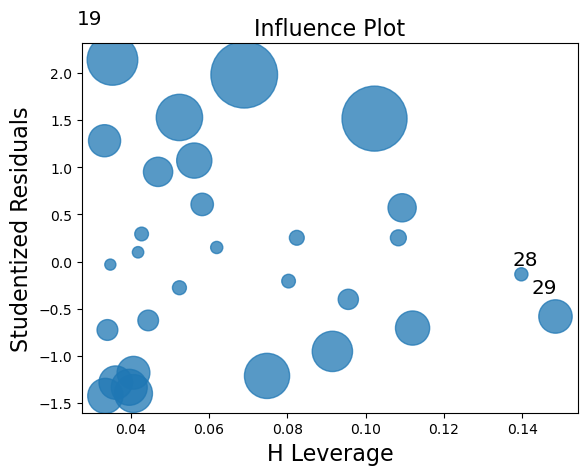

In [59]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [60]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.30000000000000004

In [62]:
final_model = smf.ols('Salary~ YearsExperience' , data = data).fit()

In [63]:
final_model.rsquared, final_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## Taking value from user and predicting salary

In [65]:
value = float(input("Enter Years of experience: "))



Enter Years of experience: 6


In [68]:
new_data = pd.DataFrame([value], columns=['YearsExperience'])
new_data

final_model.predict(new_data)

0    82491.974127
dtype: float64

# Delivery_time Simple Linear Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.formula.api  as smf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv(r"F:\Data Science\Assignments\4. Simple Linear Regression\delivery_time.csv")

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [15]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


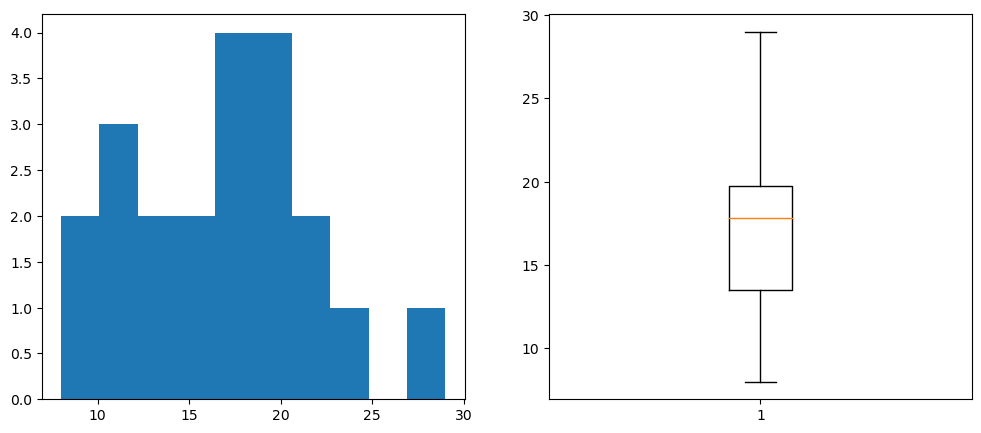

In [16]:
fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.hist(data.delivery_time)


plt.subplot(1,2,2)
plt.boxplot(data.delivery_time)
plt.show()

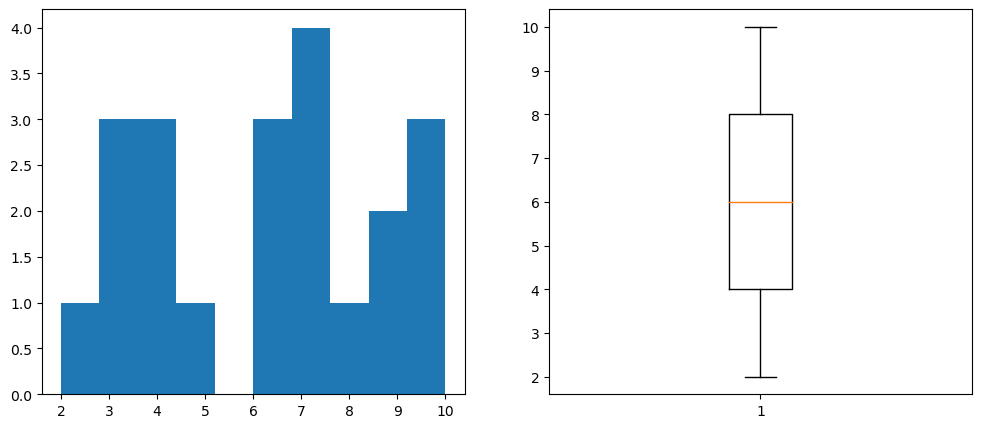

In [17]:
fig = plt.figure(figsize = (12,5))

plt.subplot(1,2,1)
plt.hist(data.sorting_time)


plt.subplot(1,2,2)
plt.boxplot(data.sorting_time)
plt.show()

In [18]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


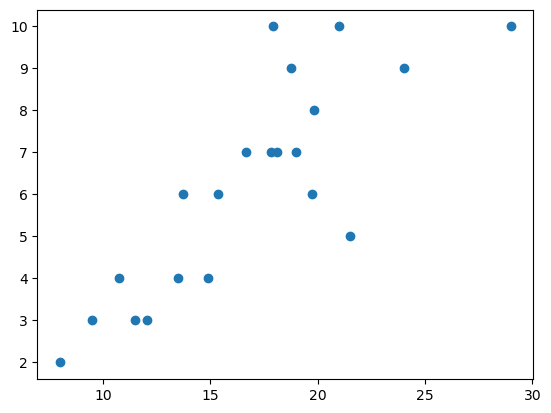

In [20]:
plt.scatter(data.delivery_time,data.sorting_time)

# Fitting model

In [51]:
model = smf.ols('delivery_time ~ sorting_time', data=data).fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        14:55:59   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [54]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [55]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

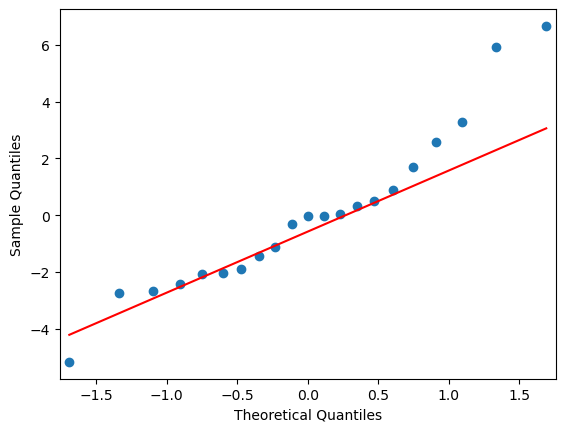

In [56]:
import statsmodels.api as sm

qqplot = sm.qqplot(model.resid, line = "q")

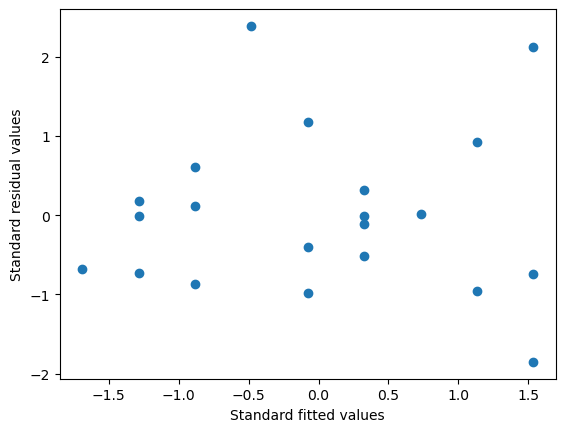

In [57]:
fitted_values = StandardScaler().fit_transform(pd.DataFrame(model.fittedvalues))
residual_values = StandardScaler().fit_transform(pd.DataFrame(model.resid))


plt.scatter(fitted_values, residual_values)
plt.xlabel("Standard fitted values")
plt.ylabel("Standard residual values")
plt.show()

eval_env: 1


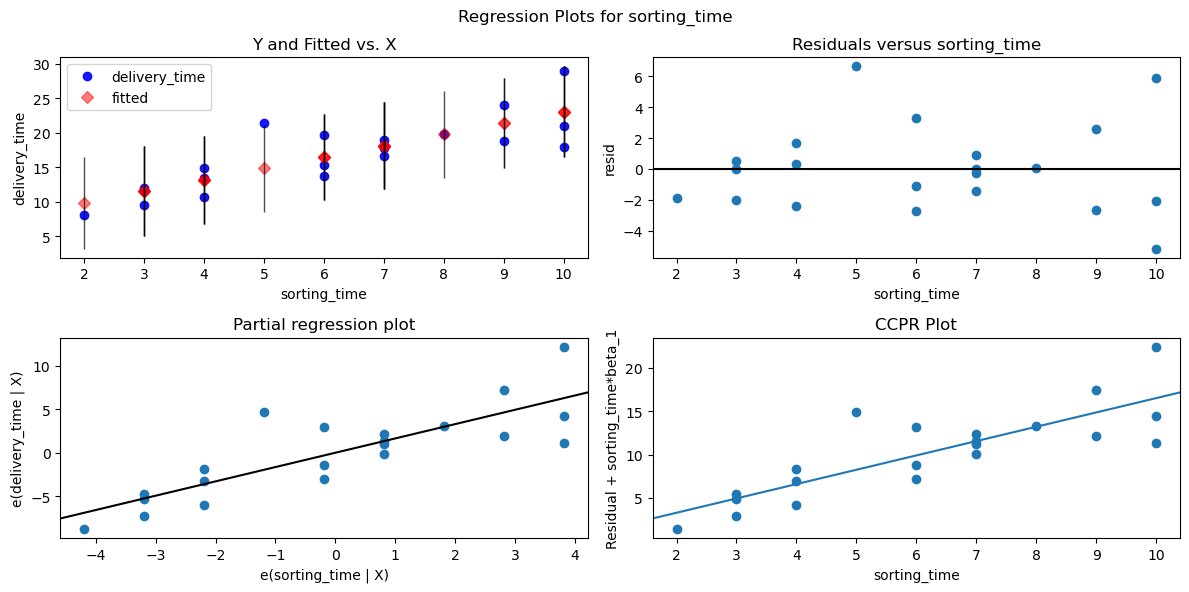

In [59]:
fig = plt.figure(figsize = (12,6))
fig = sm.graphics.plot_regress_exog(model, "sorting_time", fig = fig)

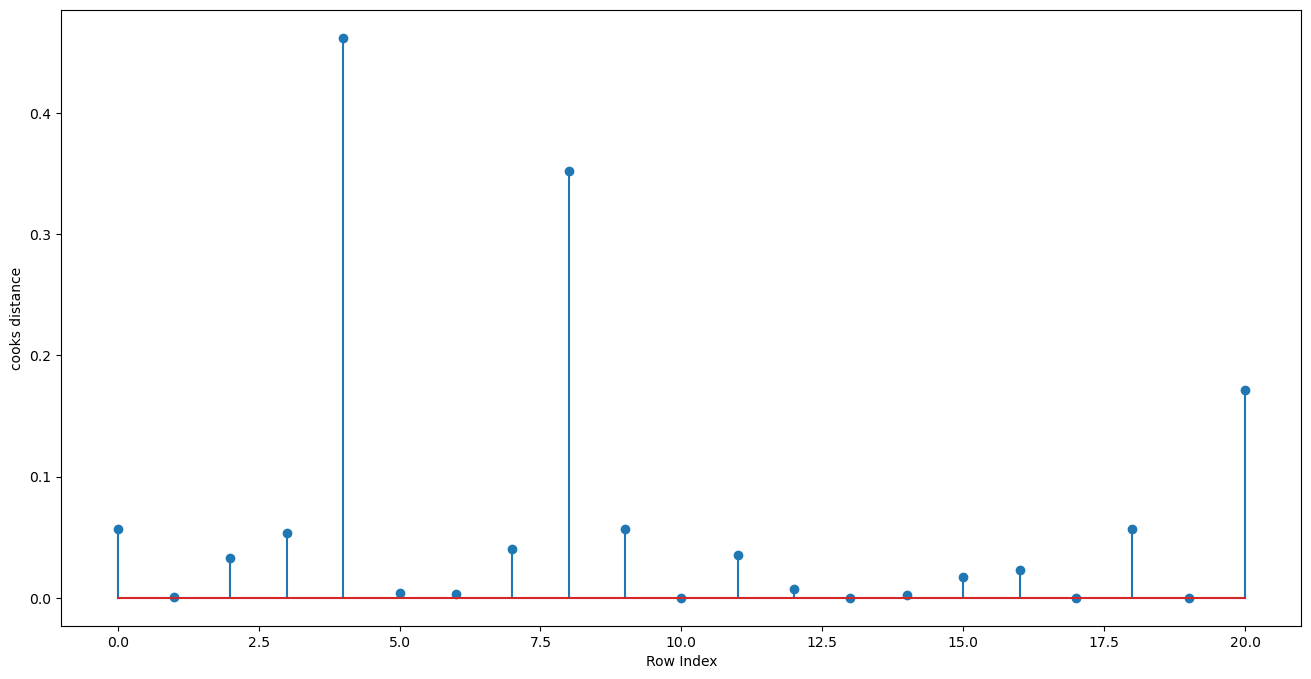

In [60]:
model_inf = model.get_influence()
(c,_) = model_inf.cooks_distance

fig = plt.figure(figsize = (16,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("cooks distance")
plt.show()

In [61]:
(np.argmax(c), np.max(c))

(4, 0.4620530412650319)

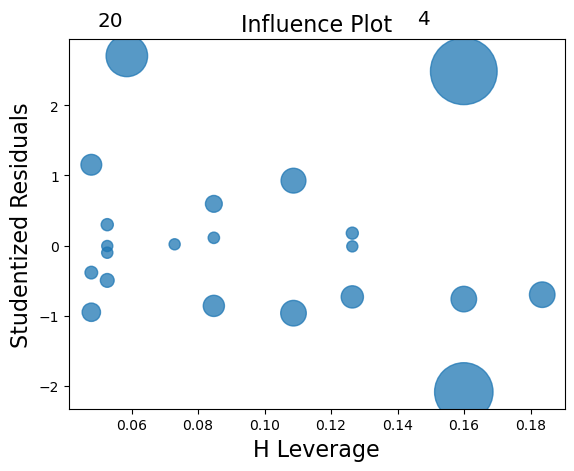

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [63]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.42857142857142855

In [64]:
final_model = smf.ols('delivery_time ~ sorting_time', data=data).fit()

In [65]:
model.rsquared

0.6822714748417231

In [66]:
model.rsquared_adj

0.6655489208860244

In [67]:
newdata = pd.Series([10,11])

In [68]:
data_pred = pd.DataFrame(newdata, columns = ['sorting_time'])
data_pred

,sorting_time
0,10
1,11


In [69]:
final_model.predict(data_pred)

0    23.072933
1    24.721953
dtype: float64